# Download data

In [8]:
!mkdir ../scratch
!wget https://zenodo.org/api/records/3445364/files-archive -O ../scratch/archive.zip
!mkdir ../scratch/data
!unzip -f ../scratch/archive.zip -d ../scratch/data/

mkdir: ../scratch: File exists
--2025-10-05 03:04:33--  https://zenodo.org/api/records/3445364/files-archive
Resolving zenodo.org (zenodo.org)... 2001:1458:d00:25::100:372, 2001:1458:d00:61::100:2f3, 2001:1458:d00:24::100:f6, ...
Connecting to zenodo.org (zenodo.org)|2001:1458:d00:25::100:372|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘../scratch/archive.zip’

../scratch/archive.     [<=>                 ] 194.57M  13.9MB/s    in 15s     

2025-10-05 03:04:49 (13.0 MB/s) - ‘../scratch/archive.zip’ saved [204018658]

mkdir: ../scratch/data: File exists
Archive:  ../scratch/archive.zip
replace ../scratch/data//ov2295_clone_clusters.csv.gz? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

OSError: [Errno 5] Input/output error

# Compare Phertilizer clustering with Laks CN Clusters

In [1]:
DATA_DIR = "../data/laks"
PHERTILIZER_OUTPUTS = "../phertilizer-outputs/laks"

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_clone_clusters = pd.read_csv(f"{DATA_DIR}/ov2295_clone_clusters.csv.gz")
df_clone_clusters

,cell_id,clone_id
0,SA1090-A96213A-R20-C09,C
1,SA1090-A96213A-R20-C11,C
2,SA1090-A96213A-R20-C19,C
3,SA1090-A96213A-R20-C24,C
4,SA1090-A96213A-R20-C27,C
...,...,...
886,SA922-A90554B-R35-C24,F
887,SA922-A90554B-R35-C25,F
888,SA922-A90554B-R35-C37,F
889,SA922-A90554B-R35-C40,F


In [4]:
df_phertilizer = pd.read_csv(f"{PHERTILIZER_OUTPUTS}/cell_clusters.csv")
df_phertilizer

,cluster,subcluster,cell
0,6,0,SA1090-A96213A-R20-C08
1,4,0,SA1090-A96213A-R20-C09
2,4,0,SA1090-A96213A-R20-C10
3,4,0,SA1090-A96213A-R20-C11
4,4,0,SA1090-A96213A-R20-C12
...,...,...,...
1717,9,0,SA922-A90554B-R35-C66
1718,9,0,SA922-A90554B-R35-C67
1719,9,0,SA922-A90554B-R35-C68
1720,8,0,SA922-A90554B-R35-C69


In [13]:
df = pd.merge(df_phertilizer, df_clone_clusters,
                     left_on="cell",
                     right_on="cell_id",
                     how="left")

df

,cluster,subcluster,cell,cell_id,clone_id
0,6,0,SA1090-A96213A-R20-C08,NaN,NaN
1,4,0,SA1090-A96213A-R20-C09,SA1090-A96213A-R20-C09,C
2,4,0,SA1090-A96213A-R20-C10,NaN,NaN
3,4,0,SA1090-A96213A-R20-C11,SA1090-A96213A-R20-C11,C
4,4,0,SA1090-A96213A-R20-C12,SA1090-A96213A-R20-C12,D
...,...,...,...,...,...
1717,9,0,SA922-A90554B-R35-C66,NaN,NaN
1718,9,0,SA922-A90554B-R35-C67,NaN,NaN
1719,9,0,SA922-A90554B-R35-C68,NaN,NaN
1720,8,0,SA922-A90554B-R35-C69,SA922-A90554B-R35-C69,E


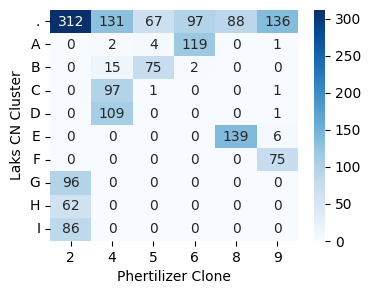

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['clone_id'] = df['clone_id'].fillna('.')

cm = pd.crosstab(df['clone_id'], df['cluster'], rownames=['Laks CN Cluster'], colnames=['Phertilizer Clone'])

# Plot
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.yticks(rotation=0)
plt.savefig(f"../phertilizer-outputs/laks/phertilizer-laks-clone-mapping.svg")
plt.show()

# Compare SCOPE mutation clusters with Phertilizer Mutation Clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
phertilizer_snv_cluster = pd.read_csv("../phertilizer-outputs/laks/SNV_clusters.csv")
phertilizer_snv_cluster['mutation'] = phertilizer_snv_cluster['mutation'].str.split('_').str[1]
phertilizer_snv_cluster

,cluster,mutation
0,7,10:100129846:C:A
1,7,10:100185101:A:G
2,0,10:100209326:T:C
3,7,10:100283942:C:T
4,5,10:10086005:G:T
...,...,...
13827,2,X:98278474:C:A
13828,4,X:98452192:T:C
13829,0,X:98700894:C:T
13830,7,X:99136386:C:T


In [4]:
kmeans_labels = pd.read_csv("../data/laks/scope/kmeans_cleaned_clones.csv", index_col=0)
kmeans_labels

,mutation,clone
0,10:100129846:C:A,1
1,10:100185101:A:G,1
2,10:100209326:T:C,2
3,10:100283942:C:T,9
4,10:10086005:G:T,7
...,...,...
14063,X:98278474:C:A,0
14064,X:98452192:T:C,5
14065,X:98700894:C:T,2
14066,X:99136386:C:T,1


In [5]:
merged = pd.merge(kmeans_labels, phertilizer_snv_cluster, on='mutation', how='left')
merged['cluster'] = merged['cluster'].fillna(-1).astype(int)
merged

,mutation,clone,cluster
0,10:100129846:C:A,1,7
1,10:100185101:A:G,1,7
2,10:100209326:T:C,2,0
3,10:100283942:C:T,9,7
4,10:10086005:G:T,7,5
...,...,...,...
14063,X:98278474:C:A,0,2
14064,X:98452192:T:C,5,4
14065,X:98700894:C:T,2,0
14066,X:99136386:C:T,1,7


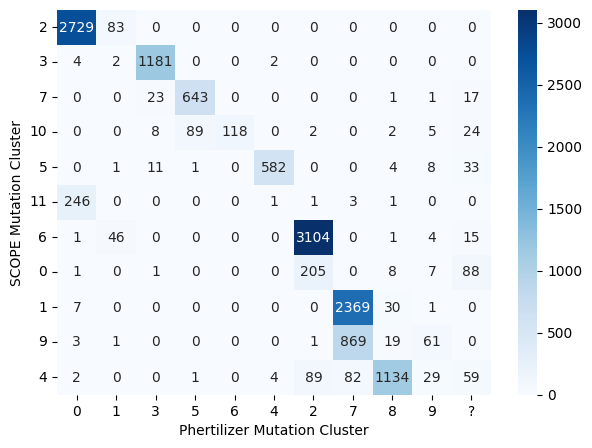

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = merged
df['cluster'] = df['cluster'].replace(-1, '?')

row_order = [2, 3, 7, 10, 5, 11, 6,  0,  1,  9, 4,]
col_order = [0, 1, 3, 5, 6, 4, 2, 7, 8, 9, '?']

cm = pd.crosstab(df['clone'], df['cluster'], 
                 rownames=['SCOPE Mutation Cluster'], 
                 colnames=['Phertilizer Mutation Cluster'])

cm = cm.reindex(index=row_order, columns=col_order)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.yticks(rotation=0)
plt.savefig("../data/laks/scope-phertilizer-mutation-mapping.svg")
plt.show()


# Scratch

In [9]:
df_phertilizer["phertilizer_root"] = (df_phertilizer["cluster"] == 0).astype(int)

In [10]:
df_f_plus = pd.read_csv("../outputs/f_plus_roots.csv")
df_f_plus

,Unnamed: 0,mutation,F(+)
0,0,10:100129846:C:A,0
1,1,10:100185101:A:G,0
2,2,10:100209326:T:C,1
3,3,10:100283942:C:T,0
4,4,10:10086005:G:T,0
...,...,...,...
14063,14063,X:98278474:C:A,0
14064,14064,X:98452192:T:C,0
14065,14065,X:98700894:C:T,1
14066,14066,X:99136386:C:T,0


In [11]:
df_phertilizer_mutations = pd.read_csv(f"{PHERTILIZER_OUTPUTS}/SNV_clusters.csv")
df_phertilizer_mutations["mutation"] = df_phertilizer_mutations["mutation"].str.split("_").str[1]
df_phertilizer_mutations

,cluster,mutation
0,7,10:100129846:C:A
1,7,10:100185101:A:G
2,0,10:100209326:T:C
3,7,10:100283942:C:T
4,5,10:10086005:G:T
...,...,...
13827,2,X:98278474:C:A
13828,4,X:98452192:T:C
13829,0,X:98700894:C:T
13830,7,X:99136386:C:T


In [12]:
df_phertilizer_mutations["phertilizer_root"] = (df_phertilizer_mutations["cluster"] == 0).astype(int)
df_phertilizer_mutations

,cluster,mutation,phertilizer_root
0,7,10:100129846:C:A,0
1,7,10:100185101:A:G,0
2,0,10:100209326:T:C,1
3,7,10:100283942:C:T,0
4,5,10:10086005:G:T,0
...,...,...,...
13827,2,X:98278474:C:A,0
13828,4,X:98452192:T:C,0
13829,0,X:98700894:C:T,1
13830,7,X:99136386:C:T,0


In [13]:
df = pd.merge(df_phertilizer_mutations, df_f_plus,
                    on="mutation",
                     how="right")

df

,cluster,mutation,phertilizer_root,Unnamed: 0,F(+)
0,7.0,10:100129846:C:A,0.0,0,0
1,7.0,10:100185101:A:G,0.0,1,0
2,0.0,10:100209326:T:C,1.0,2,1
3,7.0,10:100283942:C:T,0.0,3,0
4,5.0,10:10086005:G:T,0.0,4,0
...,...,...,...,...,...
14063,2.0,X:98278474:C:A,0.0,14063,0
14064,4.0,X:98452192:T:C,0.0,14064,0
14065,0.0,X:98700894:C:T,1.0,14065,1
14066,7.0,X:99136386:C:T,0.0,14066,0


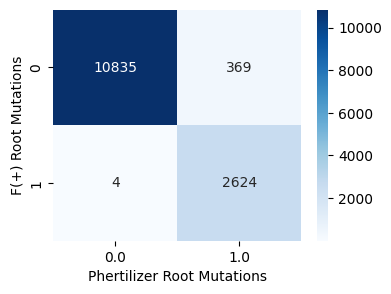

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm = pd.crosstab(df['F(+)'], df['phertilizer_root'], rownames=['F(+) Root Mutations'], colnames=['Phertilizer Root Mutations'])

# Plot
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

## Check F(+) scores at phertilizer nodes

In [15]:
F = pd.read_csv("../outputs/F.csv", index_col="clone_id")
F

,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.434783,1.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.800000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.066667,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,0.555556,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625000,0.625,0.606061,1.0,...,0.0,0.769231,0.095238,0.000000,0.666667,0.000000,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000000,1.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.842105,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.173913,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.909091,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,0.869565,0.250000,0.0,1.000000,0.0,1.000000


In [16]:
root_mutations = list(df_phertilizer_mutations[df_phertilizer_mutations["phertilizer_root"] == 1]["mutation"])

In [17]:
F_at_root_mutations = F[root_mutations]
F_at_root_mutations

,10:100209326:T:C,10:101884473:T:A,10:101943824:C:G,10:102390772:G:A,10:104288786:T:C,10:104424339:T:G,10:10576117:A:T,10:107124237:T:A,10:107625987:T:C,10:108059464:A:G,...,X:86182383:C:A,X:87975918:C:T,X:9024460:G:A,X:9220684:T:A,X:93975389:T:A,X:94344991:T:G,X:94352458:A:T,X:95174714:C:T,X:98177771:A:C,X:98700894:C:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,1.0,1.0,0.625000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,...,1.000000,0.666667,1.0,0.454545,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
B,1.0,1.0,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,...,1.000000,1.000000,1.0,0.909091,1.000000,1.0,0.666667,1.000000,1.000000,1.000000
C,1.0,1.0,0.625000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,...,0.909091,1.000000,1.0,0.769231,1.000000,1.0,1.000000,0.555556,1.000000,1.000000
D,1.0,1.0,0.666667,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,...,0.625000,1.000000,1.0,0.526316,1.000000,1.0,1.000000,1.000000,0.555556,1.000000
E,1.0,1.0,0.930233,0.555556,1.0,0.869565,1.000000,1.0,1.0,0.769231,...,0.625000,0.625000,1.0,1.000000,0.952381,1.0,0.833333,0.833333,0.666667,0.952381
F,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
G,1.0,1.0,1.000000,0.816327,0.0,1.000000,0.952381,1.0,1.0,1.000000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
H,1.0,1.0,0.903226,1.000000,0.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
I,1.0,1.0,1.000000,0.909091,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,0.869565,1.000000


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/4248591350.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.T.values, vert=False, labels=df.index)


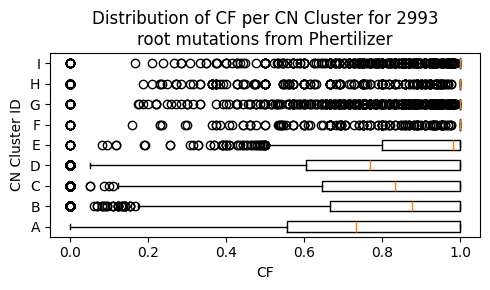

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: df is your dataframe with clone_id as index
# df = pd.read_csv("your_data.csv", index_col=0)

plt.figure(figsize=(5, 3))

df = F_at_root_mutations

# Transpose so each clone becomes a column for horizontal plotting
plt.boxplot(df.T.values, vert=False, labels=df.index)

plt.title(f"Distribution of CF per CN Cluster for {df.shape[1]}\nroot mutations from Phertilizer")
plt.xlabel("CF")
plt.ylabel("CN Cluster ID")
plt.tight_layout()
plt.show()


(9, 2993)


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/451524311.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.T.values, vert=False, labels=df.index)


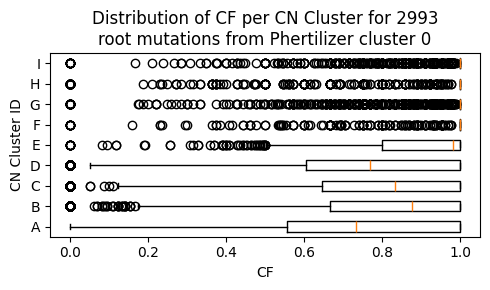

(9, 133)


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/451524311.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.T.values, vert=False, labels=df.index)


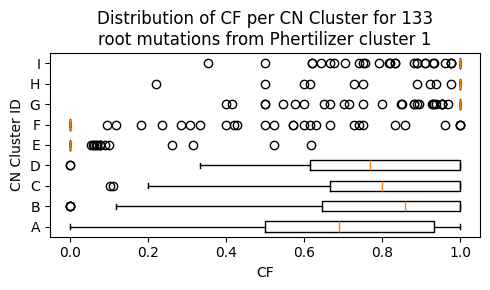

(9, 3402)


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/451524311.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.T.values, vert=False, labels=df.index)


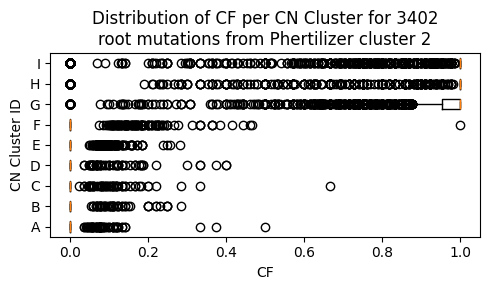

(9, 1224)


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/451524311.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.T.values, vert=False, labels=df.index)


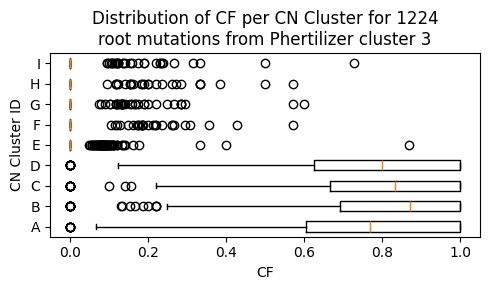

(9, 589)


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/451524311.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.T.values, vert=False, labels=df.index)


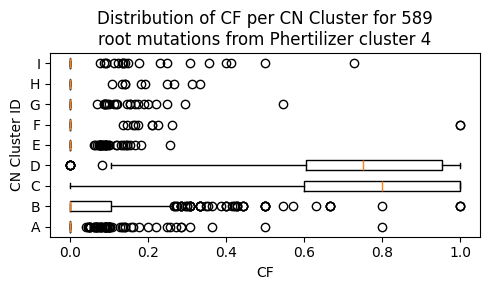

(9, 734)


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/451524311.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.T.values, vert=False, labels=df.index)


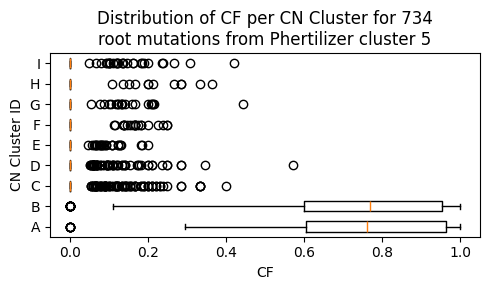

(9, 118)


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/451524311.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.T.values, vert=False, labels=df.index)


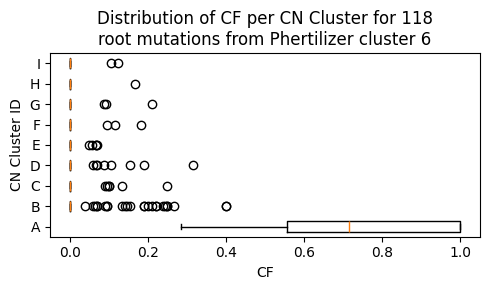

(9, 3323)


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/451524311.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.T.values, vert=False, labels=df.index)


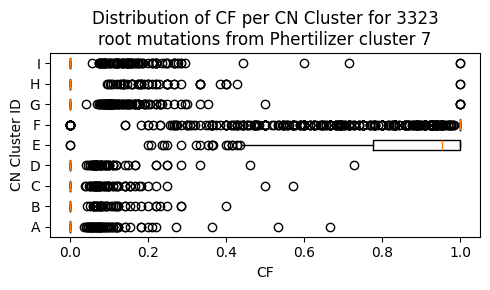

(9, 1200)


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/451524311.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.T.values, vert=False, labels=df.index)


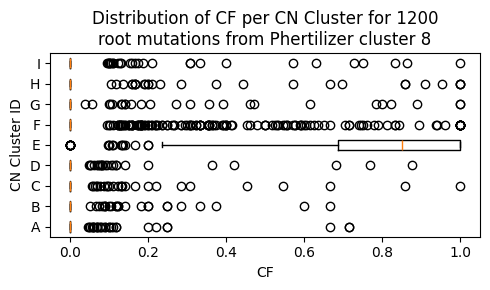

(9, 116)


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/451524311.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.T.values, vert=False, labels=df.index)


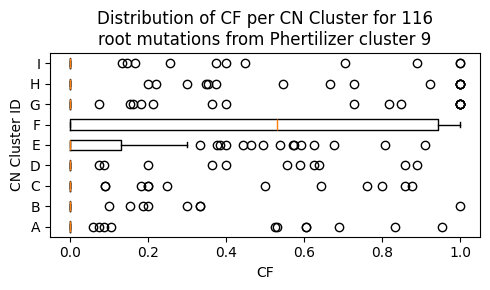

In [19]:
for cluster in sorted(df_phertilizer_mutations["cluster"].unique()):
    mutations_in_cluster = df_phertilizer_mutations[df_phertilizer_mutations["cluster"] == cluster]["mutation"]

    F_for_mutations_in_cluster = F[mutations_in_cluster]

    print(F_for_mutations_in_cluster.shape)

    plt.figure(figsize=(5, 3))

    df = F_for_mutations_in_cluster

    # Transpose so each clone becomes a column for horizontal plotting
    plt.boxplot(df.T.values, vert=False, labels=df.index)

    plt.title(f"Distribution of CF per CN Cluster for {df.shape[1]}\nroot mutations from Phertilizer cluster {cluster}")
    plt.xlabel("CF")
    plt.ylabel("CN Cluster ID")
    plt.tight_layout()
    plt.show()

    

/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/2521497218.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/2521497218.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/2521497218.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_62036/2521497218.py:

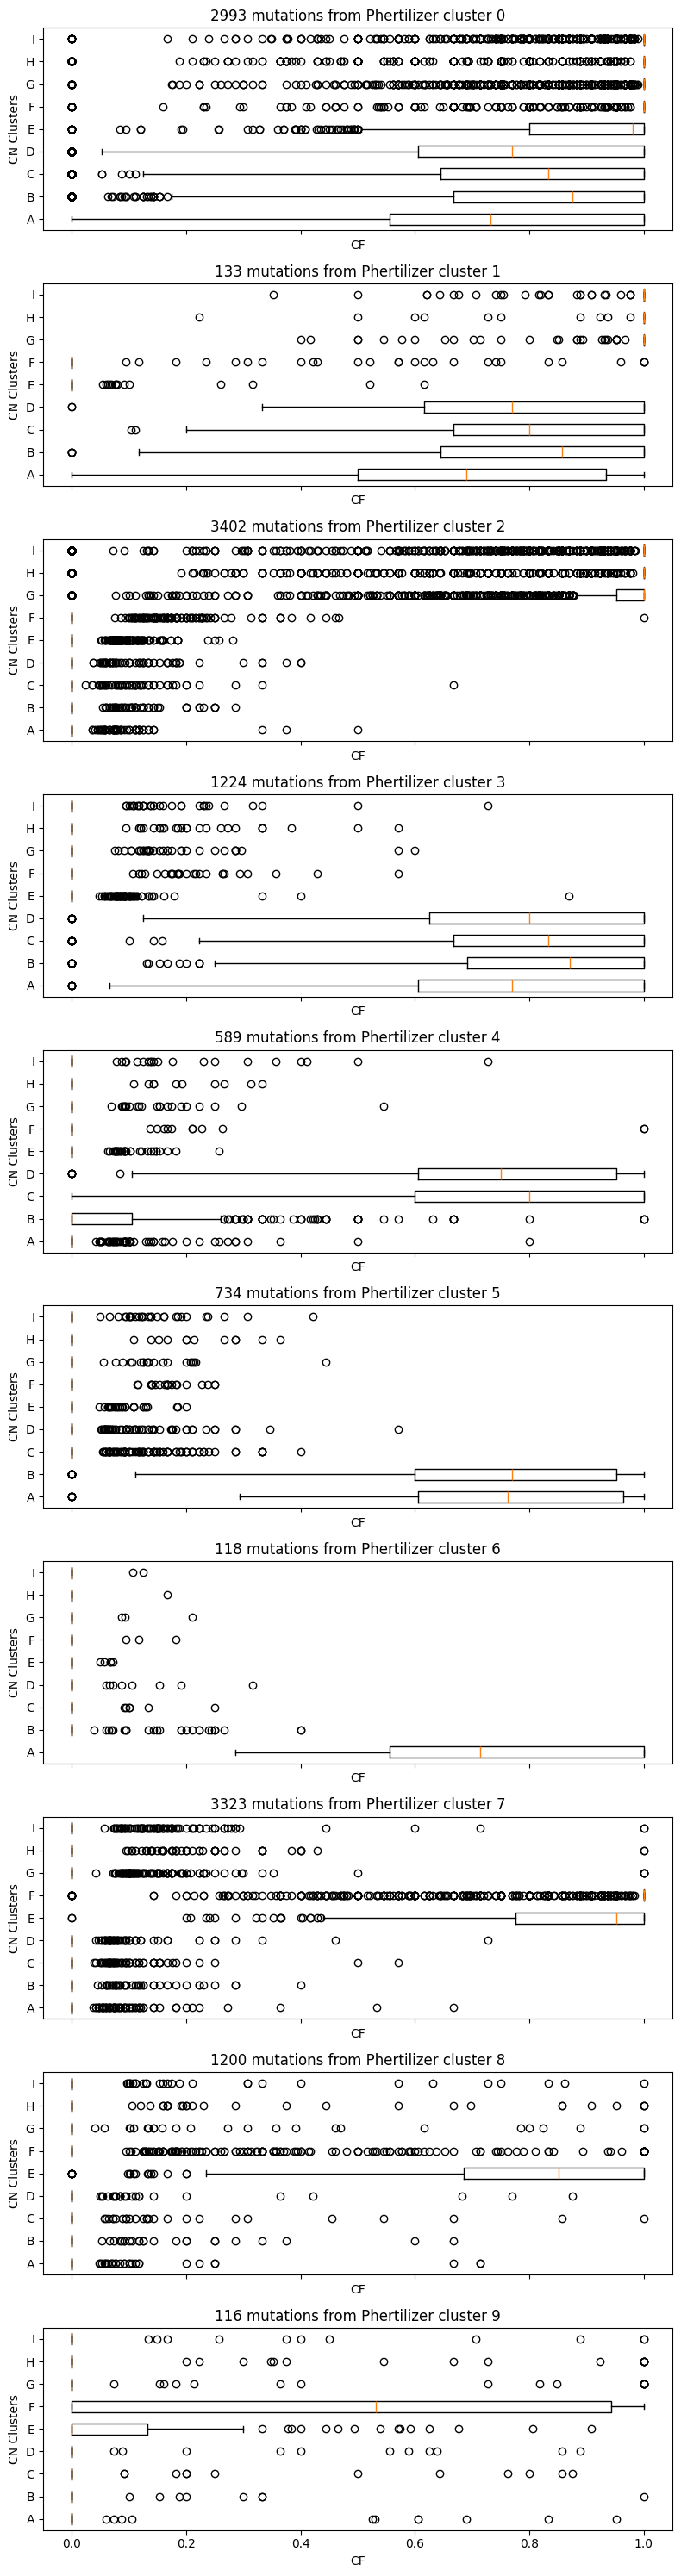

In [20]:
import matplotlib.pyplot as plt

clusters = sorted(df_phertilizer_mutations["cluster"].unique())
n_clusters = len(clusters)

fig, axes = plt.subplots(nrows=n_clusters, figsize=(8, 3*n_clusters), sharex=True)

# If only one cluster, axes might not be a list
if n_clusters == 1:
    axes = [axes]

for ax, cluster in zip(axes, clusters):
    # Get mutations for this cluster
    mutations_in_cluster = df_phertilizer_mutations[df_phertilizer_mutations["cluster"] == cluster]["mutation"]
    df = F[mutations_in_cluster]

    # Horizontal boxplot per clone
    ax.boxplot(df.T.values, vert=False, labels=df.index)

    ax.set_ylabel(f"CN Clusters")
    ax.set_xlabel("CF")
    ax.set_title(f"{df.shape[1]} mutations from Phertilizer cluster {cluster}")

plt.tight_layout()
plt.show()


# B -> A or A -> B ?

In [5]:
DATA_DIR = "../scratch/data"
PHERTILIZER_OUTPUTS = "../phertilizer-outputs/laks"

In [6]:
import pandas as pd
import numpy as np

In [11]:
df_snv_counts = pd.read_csv(f"{DATA_DIR}/ov2295_snv_counts.csv.gz", low_memory=False)
df_snv_counts

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921
...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090


In [23]:
df_cell_cn = pd.read_csv("/Users/samin/workspace/scWGS-Tumor-Phylogeny/scratch/data/ov2295_cell_cn.csv.gz")
df_cell_cn

,cell_id,sample_id,library_id,chr,start,end,reads,copy,state
0,SA922-A90554B-R34-C70,SA922,A90554B,1,1,500000,13,NaN,6
1,SA922-A90554B-R34-C70,SA922,A90554B,1,500001,1000000,442,NaN,6
2,SA922-A90554B-R34-C70,SA922,A90554B,1,1000001,1500000,461,6.672340,6
3,SA922-A90554B-R34-C70,SA922,A90554B,1,1500001,2000000,478,5.211916,6
4,SA922-A90554B-R34-C70,SA922,A90554B,1,2000001,2500000,594,8.384862,6
...,...,...,...,...,...,...,...,...,...
12200991,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,57000001,57500000,0,NaN,0
12200992,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,57500001,58000000,0,NaN,0
12200993,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,58000001,58500000,0,NaN,0
12200994,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,58500001,59000000,81,NaN,0


In [25]:
binsize = (df_cell_cn["end"] - df_cell_cn["start"] + 1).unique()[0]
binsize

np.int64(500000)

In [26]:
df_snv_counts["bin_start"] = df_snv_counts["coord"] // binsize * binsize + 1
df_snv_counts

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id,bin_start
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001
...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001


In [32]:
df_clone_clusters = pd.read_csv("/Users/samin/workspace/scWGS-Tumor-Phylogeny/scratch/data/ov2295_clone_clusters.csv.gz")
df_clone_clusters

,cell_id,clone_id
0,SA1090-A96213A-R20-C09,C
1,SA1090-A96213A-R20-C11,C
2,SA1090-A96213A-R20-C19,C
3,SA1090-A96213A-R20-C24,C
4,SA1090-A96213A-R20-C27,C
...,...,...
886,SA922-A90554B-R35-C24,F
887,SA922-A90554B-R35-C25,F
888,SA922-A90554B-R35-C37,F
889,SA922-A90554B-R35-C40,F


In [33]:
merged = pd.merge(df_snv_counts, df_cell_cn, how="left", left_on=["cell_id", "chrom", "bin_start"], right_on=["cell_id", "chr", "start"])
merged = pd.merge(merged, df_clone_clusters, how="left", on="cell_id")
merged

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,sample_id_y,library_id,chr,start,end,reads,copy,state,clone_id
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,2,1.000000,1,NaN
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,776,1.944033,2,H
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,854,2.325511,2,H
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,663,1.979604,2,NaN
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,530,1.829550,2,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,209,0.988248,1,D
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,384,0.924362,1,C
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,456,1.219741,1,A
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,269,1.061080,1,C


In [84]:
cluster_order = ["A", "B"]

In [85]:
merged_filt = merged[merged["clone_id"].isin(cluster_order)]
merged_filt

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,sample_id_y,library_id,chr,start,end,reads,copy,state,clone_id
145,1,19671432,C,T,1,0,SA1090-A96213A-R20-C43,1,SA1090,19500001,SA1090,A96213A,1,19500001,20000000,705,1.894851,2,B
146,1,19671432,C,T,1,0,SA1090-A96213A-R20-C56,1,SA1090,19500001,SA1090,A96213A,1,19500001,20000000,1027,2.266033,2,A
155,1,19671432,C,T,1,0,SA1090-A96213A-R22-C46,1,SA1090,19500001,SA1090,A96213A,1,19500001,20000000,998,2.126028,2,B
160,1,19671432,C,T,1,0,SA1090-A96213A-R24-C48,1,SA1090,19500001,SA1090,A96213A,1,19500001,20000000,894,1.954921,2,A
164,1,19671432,C,T,1,0,SA1090-A96213A-R25-C16,1,SA1090,19500001,SA1090,A96213A,1,19500001,20000000,1144,1.859629,2,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800225,4,41216727,G,T,0,2,SA1090-A96213A-R28-C13,2,SA1090,41000001,SA1090,A96213A,4,41000001,41500000,787,1.993468,2,A
3800227,4,41216727,G,T,0,1,SA1090-A96213A-R28-C20,1,SA1090,41000001,SA1090,A96213A,4,41000001,41500000,962,2.273234,2,B
3800230,4,41216727,G,T,1,0,SA1090-A96213A-R29-C35,1,SA1090,41000001,SA1090,A96213A,4,41000001,41500000,723,1.839015,2,B
3800236,4,41216727,G,T,0,2,SA1090-A96213A-R33-C36,2,SA1090,41000001,SA1090,A96213A,4,41000001,41500000,440,1.924463,2,B


In [86]:
df = merged_filt
df["mutation"] = df["chrom"].astype(str) + ":" + df["coord"].astype(str) + ":" + df["ref"] + ":" + df["alt"]

merged_filt["mutation"]

/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_81266/2878050239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mutation"] = df["chrom"].astype(str) + ":" + df["coord"].astype(str) + ":" + df["ref"] + ":" + df["alt"]


145        1:19671432:C:T
146        1:19671432:C:T
155        1:19671432:C:T
160        1:19671432:C:T
164        1:19671432:C:T
                ...      
3800225    4:41216727:G:T
3800227    4:41216727:G:T
3800230    4:41216727:G:T
3800236    4:41216727:G:T
3800281    5:62716827:T:A
Name: mutation, Length: 380571, dtype: object

In [87]:
mutation_counts = (
    merged_filt[merged_filt["alt_counts"] > 0]
    .groupby("clone_id")
    .size()
    .reset_index(name="mutation_count")
)
mutation_counts

,clone_id,mutation_count
0,A,46794
1,B,32496


In [88]:
mutations_present_at_top = merged_filt[(merged_filt["clone_id"] == cluster_order[0]) & (merged_filt["alt_counts"] > 0)]["mutation"].unique()
mutations_present_at_top

array(['8:93985289:G:A', '8:105830660:T:A', '8:105830661:C:T', ...,
       '19:39833202:G:T', '4:138711030:C:G', '4:41216727:G:T'],
      shape=(5204,), dtype=object)

In [89]:
mutation_counts = (
    merged_filt[(merged_filt["alt_counts"] > 0) & (merged_filt["mutation"].isin(mutations_present_at_top))]
    .groupby("clone_id")
    .size()
    .reset_index(name="mutation_count")
)
mutation_counts

,clone_id,mutation_count
0,A,46794
1,B,31762


In [90]:
mutations_maybe_absent_at_bottom = merged_filt[(merged_filt["clone_id"] == cluster_order[1]) & 
                                               (merged_filt["alt_counts"] == 0) & 
                                               (merged_filt["total_counts"] > 0)
                                               ]["mutation"].unique()
mutations_maybe_absent_at_bottom

array(['1:19671432:C:T', '5:45723529:C:T', '8:93985289:G:A', ...,
       '19:39833202:G:T', '4:138711030:C:G', '4:41216727:G:T'],
      shape=(13071,), dtype=object)

In [91]:
mutations_absent_at_bottom = merged_filt[(merged_filt["clone_id"] == cluster_order[1]) & 
                                               (merged_filt["alt_counts"] == 0) & 
                                               (merged_filt["total_counts"] > 0) &
                                               (merged_filt["state"] == 1)
                                               ]["mutation"].unique()
mutations_absent_at_bottom

array(['14:75449159:C:T', '16:56749364:A:T', '3:181718871:T:A', ...,
       'X:18764011:A:C', '16:924388:C:A', '4:138711030:C:G'],
      shape=(3816,), dtype=object)

In [92]:
print(len(set(merged_filt["mutation"])))
print(len(set(mutations_present_at_top)))
print(len(set(mutations_present_at_top) & set(mutations_maybe_absent_at_bottom)))
print(len(set(mutations_present_at_top) & set(mutations_absent_at_bottom)))

14051
5204
4287
634


In [36]:
import matplotlib.pyplot as plt

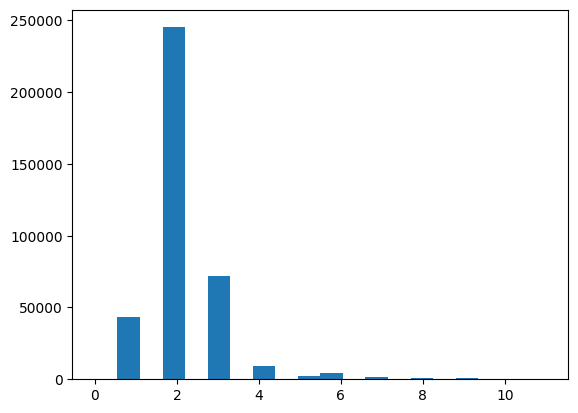

In [38]:
plt.hist(merged_filt["state"], bins=20)
plt.show()

In [19]:
df = pd.read_csv(f"{DATA_DIR}/ov2295_clone_snvs.csv.gz", low_memory=False)
df["mutation"] = df["chrom"].astype(str) + ":" + df["coord"].astype(str) + ":" + df["ref"] + ":" + df["alt"]
df

,chrom,coord,ref,alt,clone_id,ref_counts,alt_counts,total_counts,is_present,is_het,is_hom,mutation
0,1,985349,G,A,A,18,0,18,0,0,0,1:985349:G:A
1,1,985349,G,A,B,19,0,19,0,0,0,1:985349:G:A
2,1,985349,G,A,C,14,0,14,0,0,0,1:985349:G:A
3,1,985349,G,A,D,18,0,18,0,0,0,1:985349:G:A
4,1,985349,G,A,E,6,10,23,1,1,0,1:985349:G:A
...,...,...,...,...,...,...,...,...,...,...,...,...
126607,X,154563943,T,A,E,0,10,13,1,1,0,X:154563943:T:A
126608,X,154563943,T,A,F,0,10,14,1,1,0,X:154563943:T:A
126609,X,154563943,T,A,G,22,0,22,0,0,0,X:154563943:T:A
126610,X,154563943,T,A,H,10,0,10,0,0,0,X:154563943:T:A


In [22]:
df[df["clone_id"].isin(["A", "B"])]

,chrom,coord,ref,alt,clone_id,ref_counts,alt_counts,total_counts,is_present,is_het,is_hom,mutation
0,1,985349,G,A,A,18,0,18,0,0,0,1:985349:G:A
1,1,985349,G,A,B,19,0,19,0,0,0,1:985349:G:A
9,1,1079129,G,T,A,41,0,41,0,0,0,1:1079129:G:T
10,1,1079129,G,T,B,14,0,14,0,0,0,1:1079129:G:T
18,1,2032634,T,C,A,12,6,18,1,1,0,1:2032634:T:C
...,...,...,...,...,...,...,...,...,...,...,...,...
126586,X,152920716,T,C,B,1,0,1,0,0,0,X:152920716:T:C
126594,X,153905735,C,A,A,17,0,17,0,0,0,X:153905735:C:A
126595,X,153905735,C,A,B,15,0,15,0,0,0,X:153905735:C:A
126603,X,154563943,T,A,A,22,0,22,0,0,0,X:154563943:T:A


# Analysizing SBMClone outputs

In [1]:
with open("/Users/samin/workspace/scWGS-Tumor-Phylogeny/sbmclone-outputs/laks/cluster-assignments.txt", "r") as f:
    cell_assignments = f.readline().strip()
    mut_assignments = f.readline().strip()

cell_assignments = cell_assignments.split(",")
mut_assignments = mut_assignments.split(",")

print(cell_assignments)
print(mut_assignments)

['1', '4', '4', '4', '2', '4', '4', '2', '2', '2', '2', '2', '4', '4', '2', '2', '2', '2', '2', '4', '4', '2', '2', '1', '2', '4', '4', '4', '2', '2', '4', '2', '2', '2', '2', '2', '4', '4', '2', '2', '2', '4', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '4', '2', '2', '4', '4', '2', '2', '4', '2', '2', '2', '2', '2', '4', '2', '2', '4', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '4', '2', '4', '2', '2', '4', '2', '4', '2', '2', '2', '2', '4', '2', '2', '4', '2', '2', '2', '2', '4', '4', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '4', '2', '2', '4', '2', '2', '2', '2', '2', '4', '4', '4', '2', '4', '2', '2', '2', '4', '6', '4', '4', '6', '6', '6', '4', '6', '6', '6', '4', '4', '4', '6', '4', '4', '4', '4', '4', '4', '4', '6', '1', '4', '6', '2', '4', '6', '4', '4', '4', '4', '4', '4', '4', '6', '4', '1', '4',

In [7]:
import pandas as pd

cell_codes = pd.read_csv("/Users/samin/workspace/scWGS-Tumor-Phylogeny/sbmclone-outputs/laks/cell_code.csv")
cell_codes

,Unnamed: 0,cell_id,cell_code
0,0,SA921-A90554A-R03-C03,739
1,1,SA921-A90554A-R03-C13,743
2,2,SA921-A90554A-R03-C21,749
3,3,SA921-A90554A-R03-C68,780
4,4,SA921-A90554A-R04-C10,787
...,...,...,...
1938,1938,SA922-A90554B-R24-C46,1437
1939,1939,SA922-A90554B-R31-C31,1745
1940,1940,SA922-A90554B-R30-C23,1691
1941,1941,SA922-A90554B-R27-C31,1557


In [16]:
df = pd.merge(cell_codes, df_clone_clusters,
                     on="cell_id",
                     how="left")
df

,Unnamed: 0,cell_id,cell_code,clone_id
0,0,SA921-A90554A-R03-C03,739,NaN
1,1,SA921-A90554A-R03-C13,743,H
2,2,SA921-A90554A-R03-C21,749,H
3,3,SA921-A90554A-R03-C68,780,NaN
4,4,SA921-A90554A-R04-C10,787,I
...,...,...,...,...
1938,1938,SA922-A90554B-R24-C46,1437,NaN
1939,1939,SA922-A90554B-R31-C31,1745,NaN
1940,1940,SA922-A90554B-R30-C23,1691,NaN
1941,1941,SA922-A90554B-R27-C31,1557,NaN


In [17]:
df.sort_values(by='cell_code')

,Unnamed: 0,cell_id,cell_code,clone_id
1917,1917,SA1090-A96213A-R20-C06,0,NaN
1367,1367,SA1090-A96213A-R20-C08,1,NaN
1614,1614,SA1090-A96213A-R20-C09,2,C
1123,1123,SA1090-A96213A-R20-C10,3,NaN
140,140,SA1090-A96213A-R20-C11,4,C
...,...,...,...,...
944,944,SA922-A90554B-R35-C66,1938,NaN
426,426,SA922-A90554B-R35-C67,1939,NaN
1045,1045,SA922-A90554B-R35-C68,1940,NaN
139,139,SA922-A90554B-R35-C69,1941,E


In [18]:
cluster_series = pd.Series(cell_assignments, index=df.sort_values(by='cell_code')['cell_code'], name="cluster")

df = df.merge(cluster_series, left_on="cell_code", right_index=True, how="left")

df

,Unnamed: 0,cell_id,cell_code,clone_id,cluster
0,0,SA921-A90554A-R03-C03,739,NaN,1
1,1,SA921-A90554A-R03-C13,743,H,3
2,2,SA921-A90554A-R03-C21,749,H,3
3,3,SA921-A90554A-R03-C68,780,NaN,3
4,4,SA921-A90554A-R04-C10,787,I,3
...,...,...,...,...,...
1938,1938,SA922-A90554B-R24-C46,1437,NaN,1
1939,1939,SA922-A90554B-R31-C31,1745,NaN,1
1940,1940,SA922-A90554B-R30-C23,1691,NaN,1
1941,1941,SA922-A90554B-R27-C31,1557,NaN,1


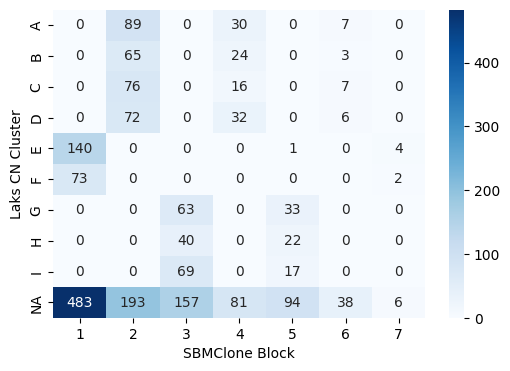

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['clone_id'] = df['clone_id'].fillna('NA')

cm = pd.crosstab(df['clone_id'], df['cluster'], rownames=['Laks CN Cluster'], colnames=['SBMClone Block'])

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()